In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
train_categories = glob.glob('dogImages/dogImages/train/*')
valid_categories = glob.glob('dogImages/dogImages/valid/*')
test_categories = glob.glob('dogImages/dogImages/test/*')

In [3]:
len(train_categories)

133

In [4]:
len(valid_categories)

133

In [5]:
len(test_categories)

133

In [6]:
from skimage import io
def sample_plot(array):
    sample_breed = np.random.choice(array, 10)
    fig, ax = plt.subplots(2, 5, figsize=(16, 8))
    for en, s in enumerate(sample_breed):
        sample_image = np.random.choice(glob.glob(s+'/*'))
        ax[en//5][en%5].imshow(io.imread(sample_image))
        ax[en//5][en%5].axis('off')
        ax[en//5][en%5].set_title(s.split('/')[-1].split('.')[1])
    plt.title('Random sample of images', fontsize=17)
    plt.show()

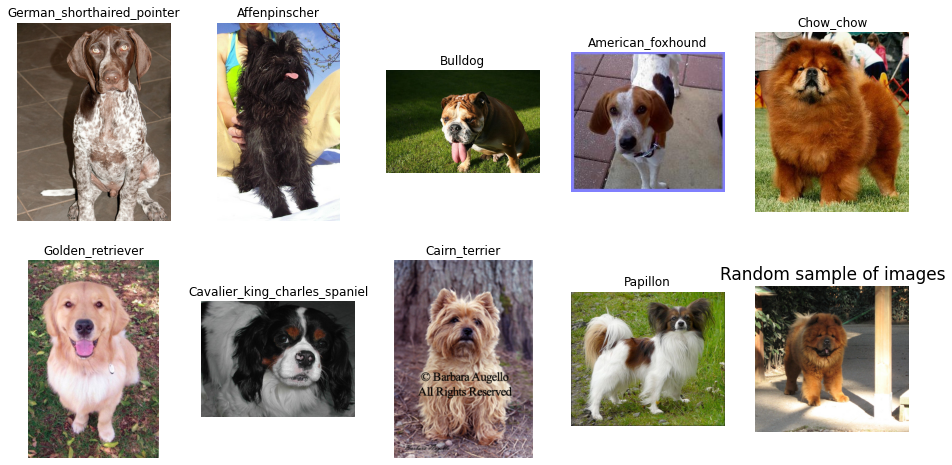

In [7]:
sample_plot(train_categories)

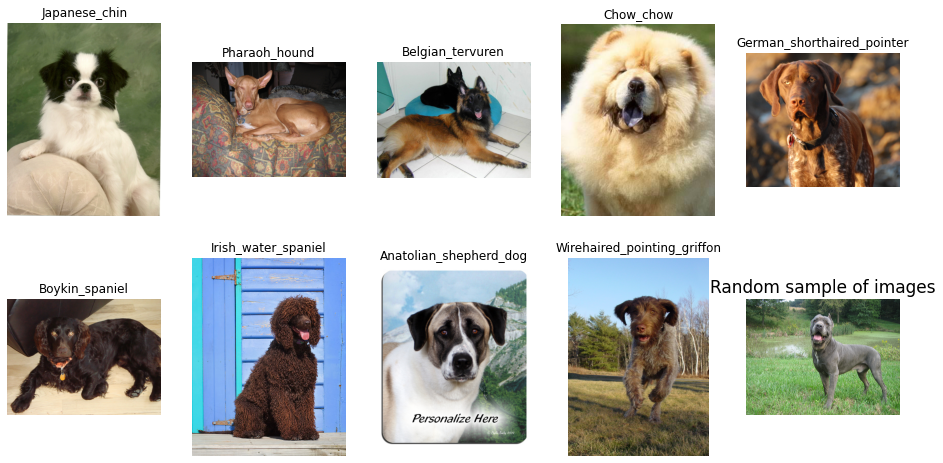

In [8]:
sample_plot(train_categories)

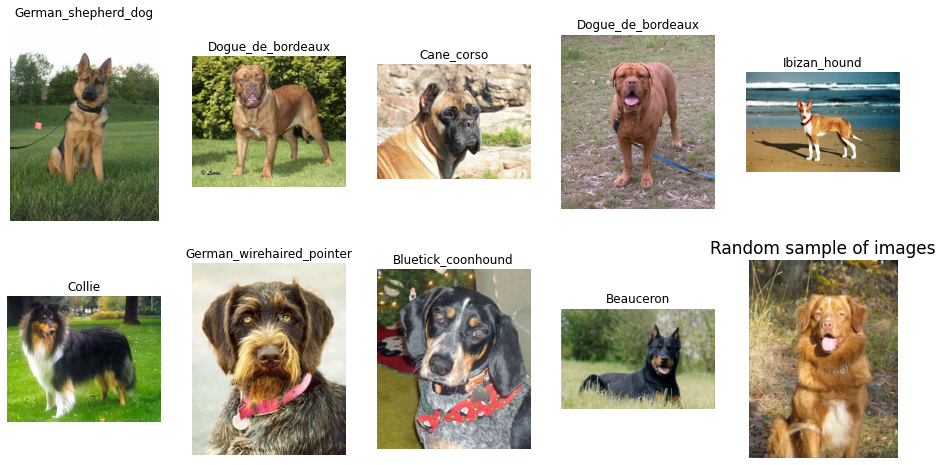

In [9]:
sample_plot(train_categories)

In [10]:
from tqdm import tqdm_notebook as tqdm

def get_images_size_distribution(array):
    images_sizes = []
    for a in tqdm(array):
        for i in glob.glob(a+'/*'):
            try:
                images_sizes.append(io.imread(i).shape)
            except:
                pass
    return images_sizes

In [11]:
train_image_sizes = get_images_size_distribution(train_categories)

C:\Users\USER\AppData\Local\Temp\ipykernel_21980\4079393510.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for a in tqdm(array):


  0%|          | 0/133 [00:00<?, ?it/s]

C:\Users\USER\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:628: UserWarning: Metadata Warning, tag 33723 had too many entries: 11, expected 1
  warnings.warn(


In [12]:
valid_image_sizes = get_images_size_distribution(valid_categories)

C:\Users\USER\AppData\Local\Temp\ipykernel_21980\4079393510.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for a in tqdm(array):


  0%|          | 0/133 [00:00<?, ?it/s]

In [13]:
test_image_sizes = get_images_size_distribution(test_categories)

C:\Users\USER\AppData\Local\Temp\ipykernel_21980\4079393510.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for a in tqdm(array):


  0%|          | 0/133 [00:00<?, ?it/s]

In [14]:
def plot_image_size_distribution(array):    
    fig, ax = plt.subplots(2, 1, figsize=(16, 12))
    
    for i in range(2):
        dim_distribution = []
        for a in array:
            try:
                dim_distribution.append(a[i])
            except:
                pass
        ax[i].hist(dim_distribution, bins=100)
        ax[i].set_title('Data distribution along dimension {}'.format(str(i)))
        ax[i].set_xlabel('Pixels along dimension {}'.format(i))
        ax[i].set_ylabel('Frequency')
    plt.show()

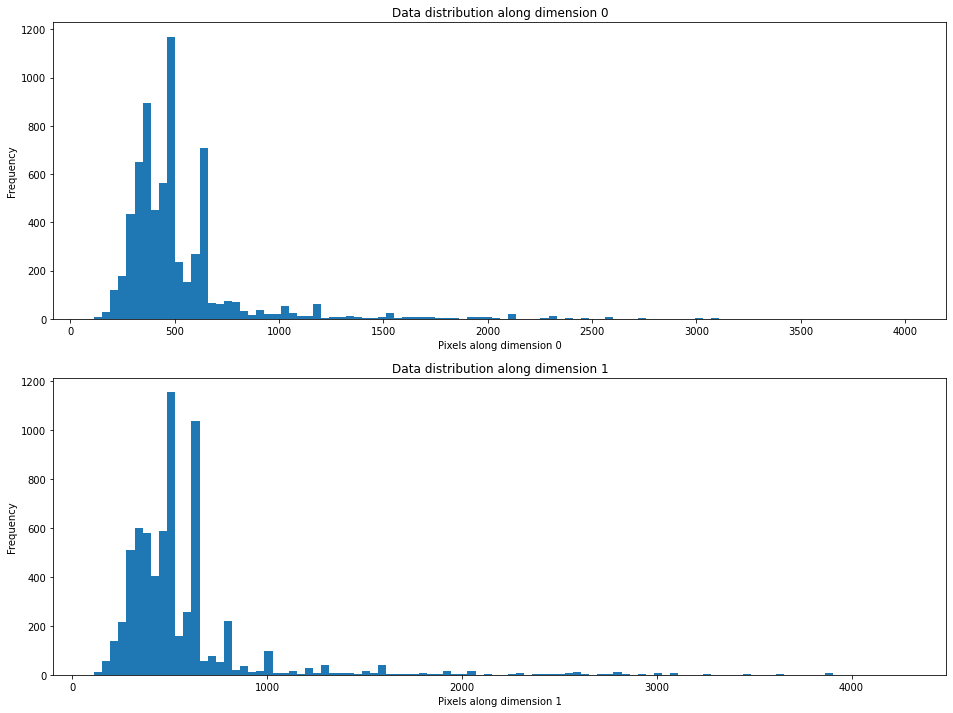

In [15]:
plot_image_size_distribution(train_image_sizes)

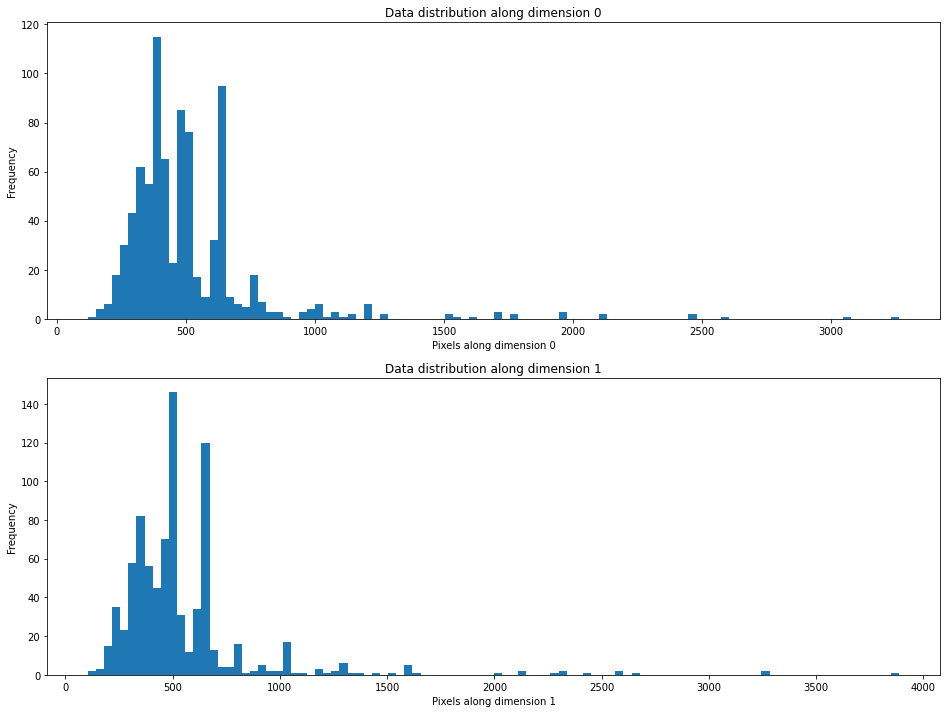

In [16]:
plot_image_size_distribution(valid_image_sizes)

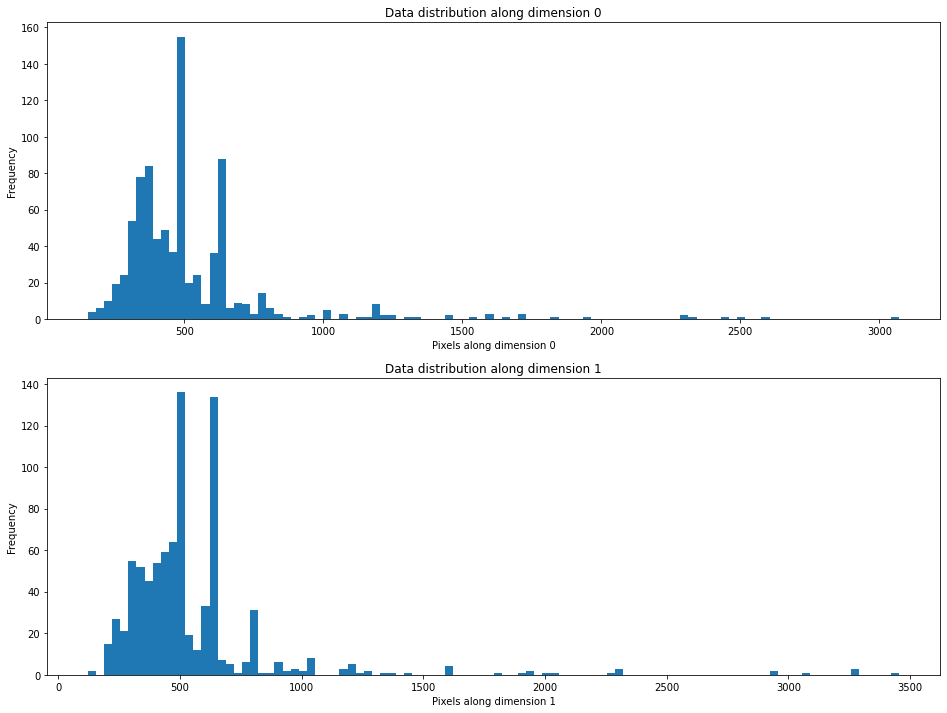

In [17]:
plot_image_size_distribution(test_image_sizes)

In [18]:
def plot_image_size_distribution_complete(array1, array2, array3):
    """
        Function to plot distribution of image features
        Input:
            array1 (list): contains image sizes of training data set
            array2 (list): contains image sizes of validation data set
            array3 (list): contains image sizes of testing data set
        Outputs:
            plot showing the distribution of image features
    """
    
    fig, ax = plt.subplots(2, 1, figsize=(16, 12))
    labels = ['train', 'valid', 'test']
    
    for i in range(2):
        dim_distribution = []
        for en, array in enumerate([array1, array2, array3]):
            for a in array:
                try:
                    dim_distribution.append(a[i])
                except:
                    pass
            ax[i].hist(dim_distribution, bins=100, alpha=0.3, label=labels[en], density=True, stacked=True)
            ax[i].set_title('Data distribution along dimension {}'.format(str(i)))
            ax[i].set_xlabel('Pixels along dimension {}'.format(i))
            ax[i].set_ylabel('Frequency in %')
            ax[i].legend()
    plt.show()

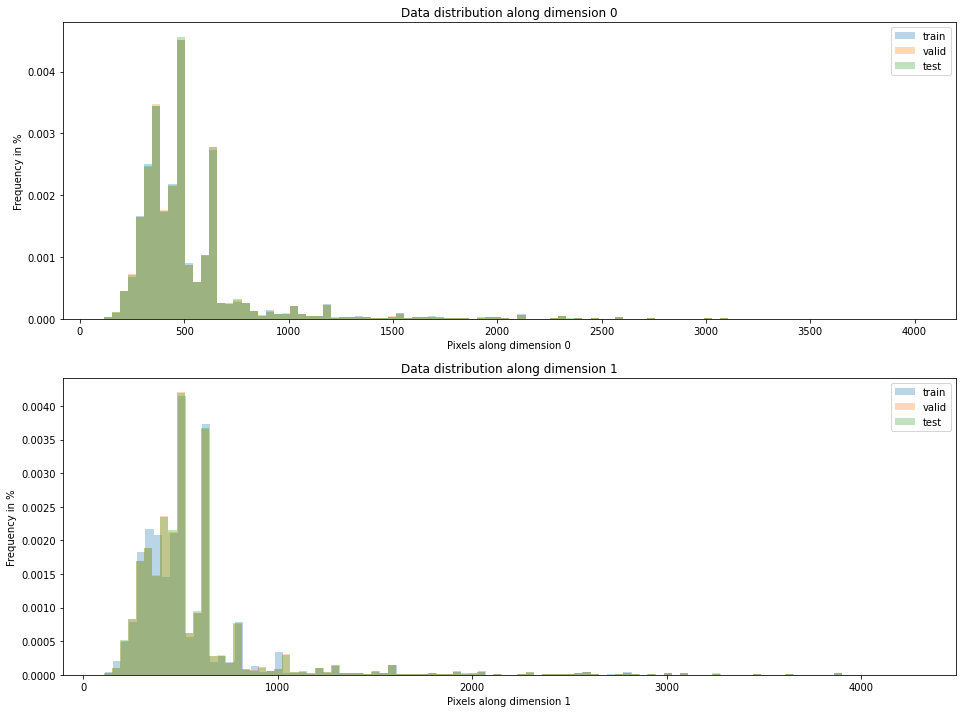

In [19]:
plot_image_size_distribution_complete(train_image_sizes, valid_image_sizes, test_image_sizes)

In [20]:
def plot_image_pixel_distribution_complete(array1, array2, array3):
    """
        Function to plot distribution of image pixels
        Input:
            array1 (list): contains image sizes of training data set
            array2 (list): contains image sizes of validation data set
            array3 (list): contains image sizes of testing data set
        Outputs:
            plot showing the distribution of image pixels
    """
    
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    labels = ['train', 'valid', 'test']
    
    
    pixel_distribution = []
    for en, array in enumerate([array1, array2, array3]):
        for a in array:
            try:
                pixel_distribution.append(a[0]*a[1]*a[2])
            except:
                pass
        ax.ticklabel_format(useOffset=False, style='plain')
        ax.hist(pixel_distribution, bins=300, alpha=0.3, label=labels[en], density=True, stacked=True)
        ax.set_title('Pixel Distribution Median: {}'.format(int(np.median(pixel_distribution))), fontsize=17)
        ax.set_xlabel('# Pixels')
        ax.set_ylabel('Frequency in %')
        ax.legend()
        
    plt.show()
    return pixel_distribution

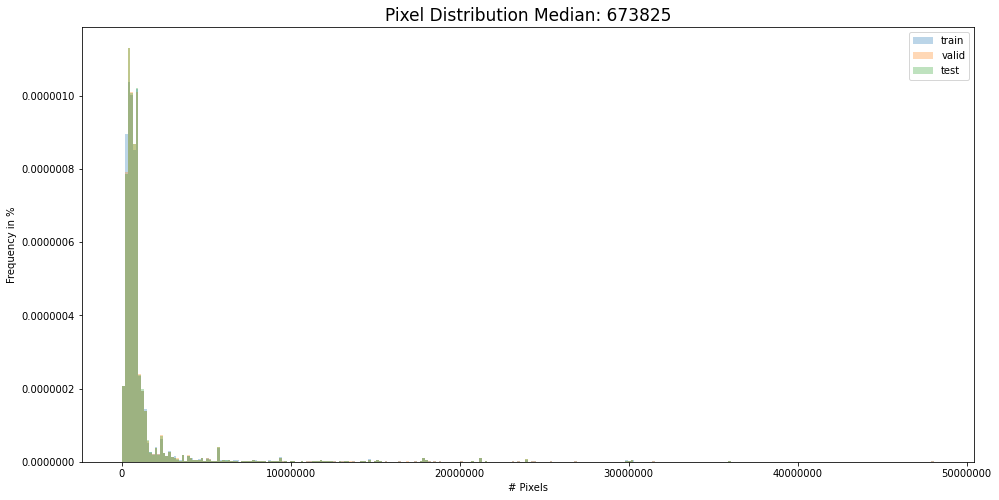

In [21]:
test = plot_image_pixel_distribution_complete(train_image_sizes, valid_image_sizes, test_image_sizes)

In [22]:
def get_data_distribution(array):
    """
        Function to extract data distribution across dog breeds
        Input:
            array (list): glob file paths for train/valid/test data sets
        Output:
            dog_breeds (list)
            nimages (list)
    """
    dog_breeds, nimages = [], []
    for a in array:
        dog_breeds.append(a.split('/')[-1].split('.')[1])
        nimages.append(len(glob.glob(a+'/*')))
    
    return dog_breeds, nimages

In [23]:
dog_breeds_train, nimages_train = get_data_distribution(train_categories)

In [24]:
dog_breeds_valid, nimages_valid = get_data_distribution(valid_categories)

In [25]:
dog_breeds_test, nimages_test = get_data_distribution(test_categories)

In [26]:
len(set(dog_breeds_train).intersection(set(dog_breeds_valid)).intersection(set(dog_breeds_test)))

133

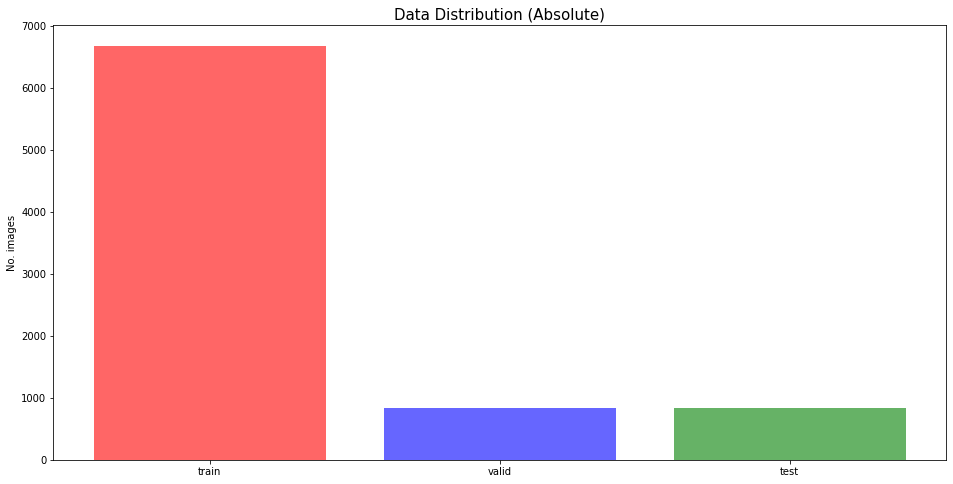

In [27]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(['train', 'valid', 'test'], [sum(nimages_train), sum(nimages_valid), sum(nimages_test)],
      color=['r', 'b', 'g'], alpha=0.6)
plt.title('Data Distribution (Absolute)', fontsize=15)
ax.set_ylabel('No. images')
plt.show()

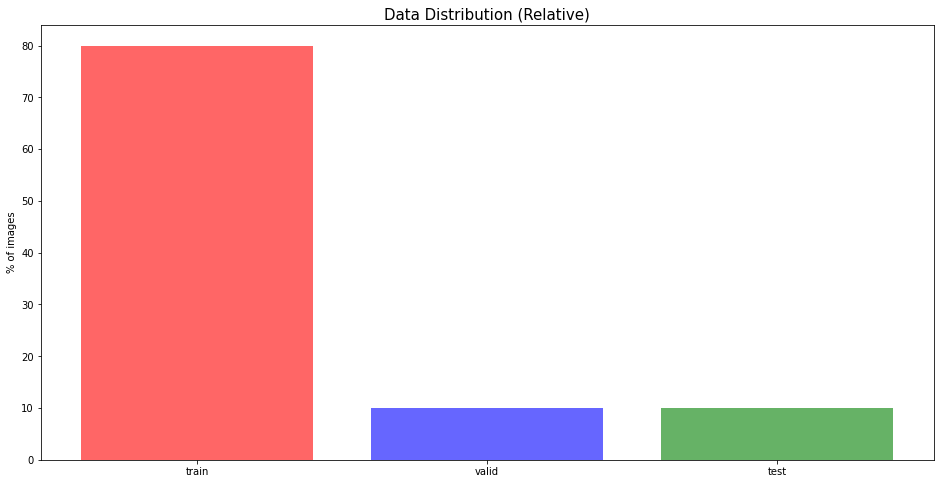

In [28]:
nimages_total = sum(nimages_train) + sum(nimages_valid) + sum(nimages_test)
fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(np.array(['train', 'valid', 'test']), np.array([sum(nimages_train), sum(nimages_valid), sum(nimages_test)])*100/nimages_total,
      color=['r', 'b', 'g'], alpha=0.6)
plt.title('Data Distribution (Relative)', fontsize=15)
ax.set_ylabel('% of images')
plt.show()

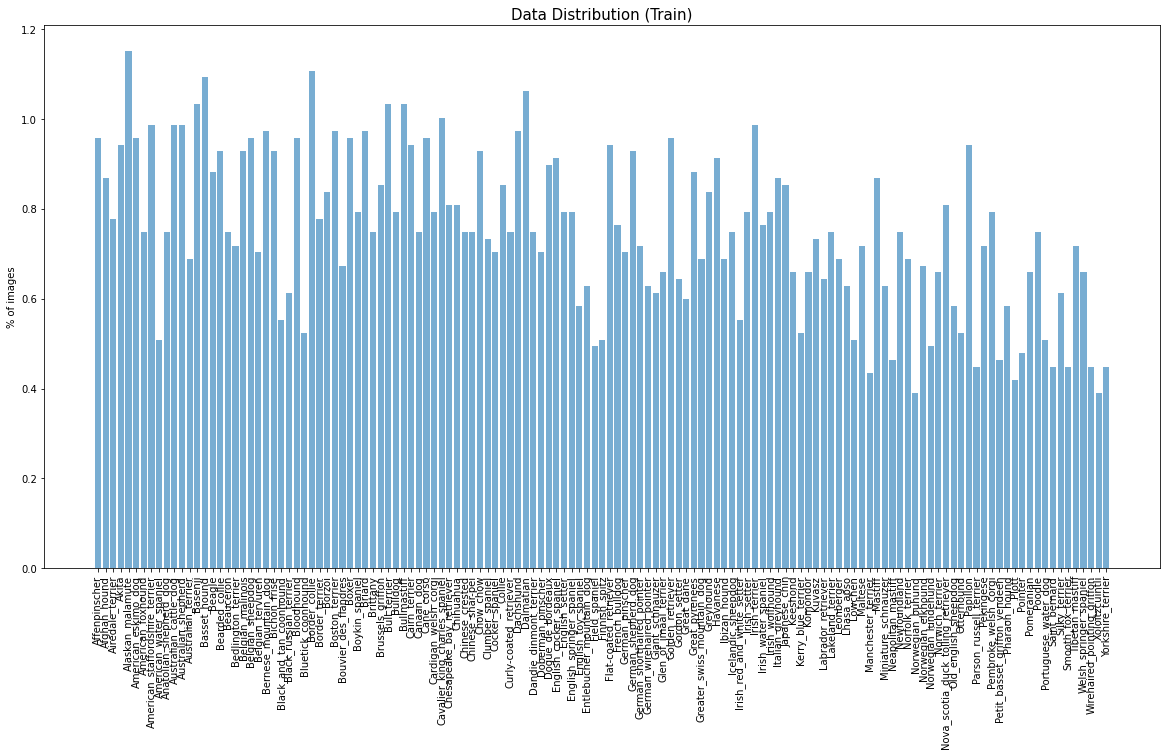

In [29]:
nimages_total = sum(nimages_train) + sum(nimages_valid) + sum(nimages_test)
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(np.array(dog_breeds_train), np.array(nimages_train)*100/sum(nimages_train), alpha=0.6)
plt.title('Data Distribution (Train)', fontsize=15)
ax.set_ylabel('% of images')
ax.xaxis.set_tick_params(rotation=90)
plt.show()

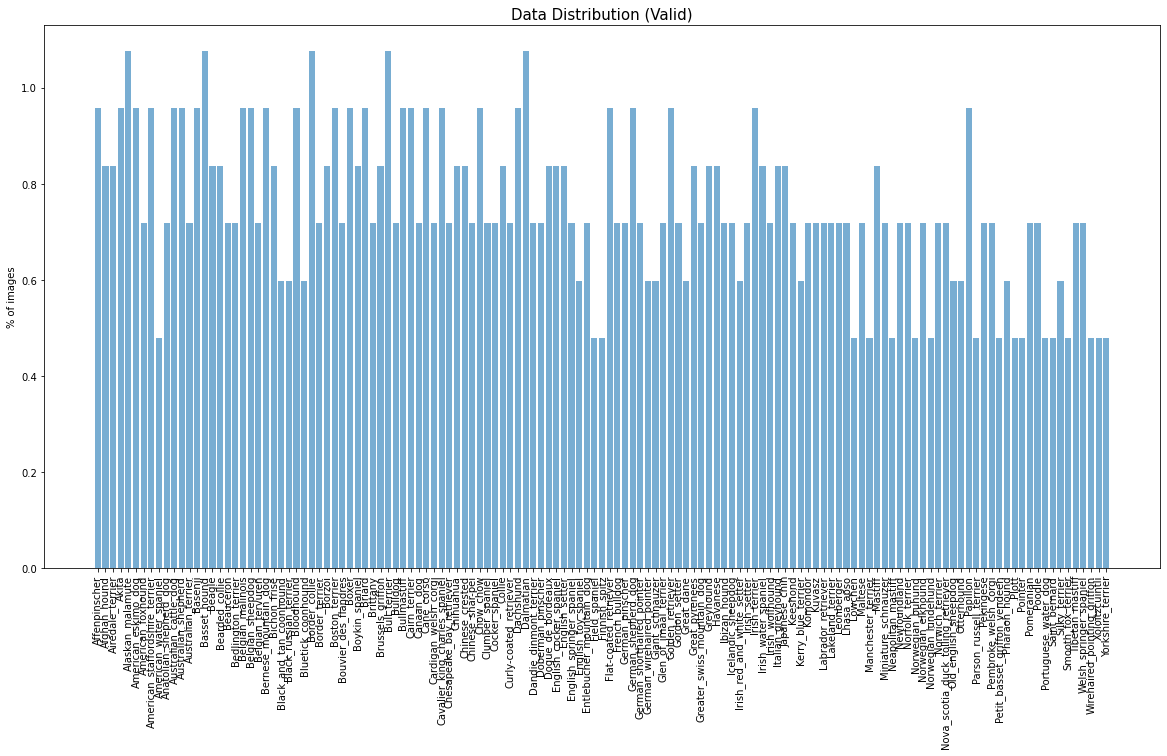

In [30]:
nimages_total = sum(nimages_train) + sum(nimages_valid) + sum(nimages_test)
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(np.array(dog_breeds_valid), np.array(nimages_valid)*100/sum(nimages_valid), alpha=0.6)
plt.title('Data Distribution (Valid)', fontsize=15)
ax.set_ylabel('% of images')
ax.xaxis.set_tick_params(rotation=90)
plt.show()

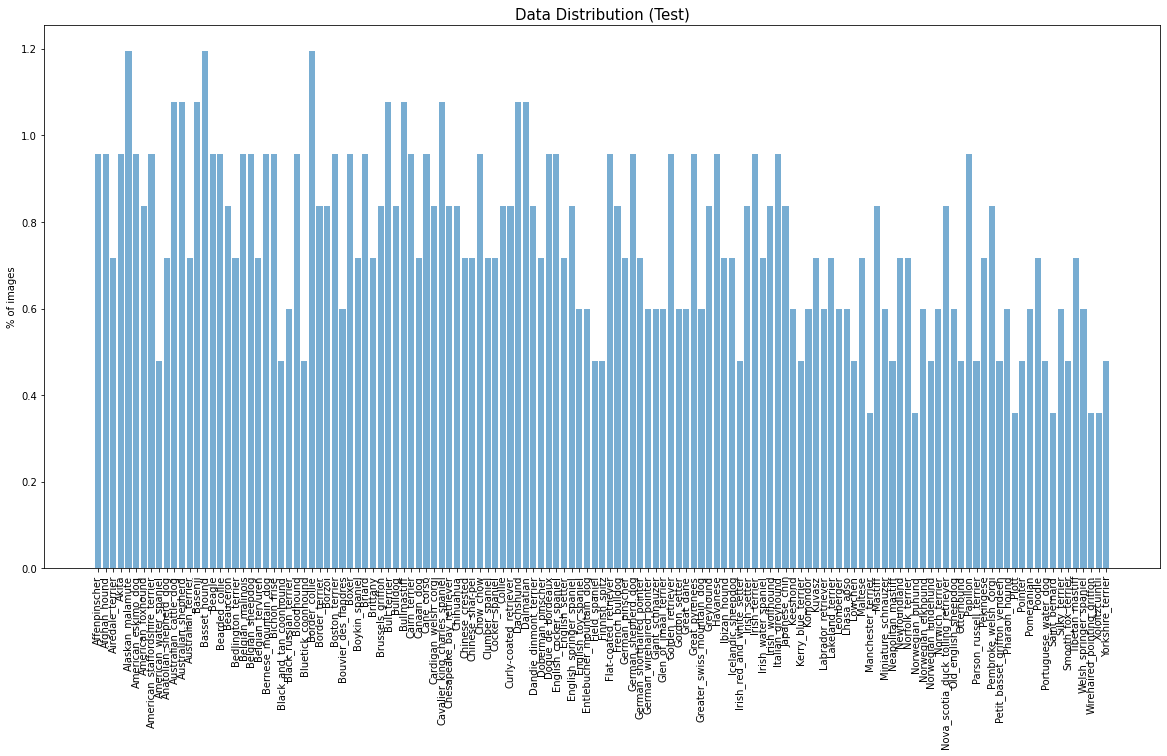

In [31]:
nimages_total = sum(nimages_train) + sum(nimages_valid) + sum(nimages_test)
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(np.array(dog_breeds_test), np.array(nimages_test)*100/sum(nimages_test), alpha=0.6)
plt.title('Data Distribution (Test)', fontsize=15)
ax.set_ylabel('% of images')
ax.xaxis.set_tick_params(rotation=90)
plt.show()

In [32]:
len(glob.glob('lfw-deepfunneled/lfw-deepfunneled/*/*'))

13233

In [33]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('dogImages/dogImages/train')
valid_files, valid_targets = load_dataset('dogImages/dogImages/valid')
test_files, test_targets = load_dataset('dogImages/dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("dogImages/dogImages/train/*/"))]
# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


In [34]:
import random
random.seed(8675309)

# load filenames in shuffled human dataset
human_files = np.array(glob("lfw-deepfunneled/lfw-deepfunneled/*/*"))
random.shuffle(human_files)

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))

There are 13233 total human images.


Number of faces detected: 1


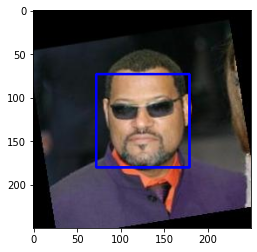

In [35]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('face.xml')

# load color (BGR) image
img = cv2.imread(human_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [36]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [37]:
human_files_short = human_files[:100]
dog_files_short = train_files[:100]

humans_detector=[face_detector(h) for h in human_files_short]    
dogs_detector=[face_detector(d) for d in dog_files_short]

In [38]:
print('Percentage of human faces detected in human_files_short - {}%'.format(sum(humans_detector)))
print('Percentage of human faces detected in dog_files_short - {}%'.format(sum(dogs_detector)))

Percentage of human faces detected in human_files_short - 100%
Percentage of human faces detected in dog_files_short - 12%


In [39]:
from tensorflow.keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

In [40]:
from tensorflow.keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [41]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

In [42]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151))

In [43]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_detector_resnet = [dog_detector(h) for h in human_files_short]
dog_detector_resnet = [dog_detector(d) for d in dog_files_short]

1/1 [==============================] - 0s 107ms/step


1/1 [==============================] - 0s 111ms/step


In [44]:
print('Percentage of dogs detected in human_files_short - {}%'.format(sum(human_detector_resnet)))
print('Percentage of dogs detected in dog_files_short - {}%'.format(sum(dog_detector_resnet)))

Percentage of dogs detected in human_files_short - 0%
Percentage of dogs detected in dog_files_short - 100%


In [45]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|███████████████████████████████████████████████████████████████████████████████| 836/836 [00:06<00:00, 134.70it/s]


In [46]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), padding='valid', activation='relu',
                input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(filters=32, kernel_size=(2,2), padding='valid', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64, kernel_size=(2,2), padding='valid', activation='relu'))
model.add(Flatten())
model.add(Dense(133, activation='softmax'))

### TODO: Define your architecture.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 64)        8256      
                                                                 
 flatten (Flatten)           (None, 186624)            0

In [47]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
from keras.callbacks import ModelCheckpoint  

### specify the number of epochs that you would like to use to train the model.

epochs = 5

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 1/5
334/334 [==============================] - ETA: 0s - loss: 4.8342 - accuracy: 0.0271
Epoch 1: val_loss improved from inf to 4.59309, saving model to saved_models\weights.best.from_scratch.hdf5
334/334 [==============================] - 311s 928ms/step - loss: 4.8342 - accuracy: 0.0271 - val_loss: 4.5931 - val_accuracy: 0.0479
Epoch 2/5
334/334 [==============================] - ETA: 0s - loss: 3.7158 - accuracy: 0.2055
Epoch 2: val_loss did not improve from 4.59309
334/334 [==============================] - 145s 435ms/step - loss: 3.7158 - accuracy: 0.2055 - val_loss: 4.7130 - val_accuracy: 0.0683
Epoch 3/5
334/334 [==============================] - ETA: 0s - loss: 0.6818 - accuracy: 0.8512
Epoch 3: val_loss did not improve from 4.59309
334/334 [==============================] - 157s 470ms/step - loss: 0.6818 - accuracy: 0.8512 - val_loss: 7.3945 - val_accuracy: 0.0575
Epoch 4/5
334/334 [==============================] - ETA: 0s - loss: 0.0861 - accuracy: 0.9820
Epoch 4: val_

In [49]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

In [50]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step
Test accuracy: 5.2632%


In [51]:
def extract_VGG16(tensor):
    from keras.applications.vgg16 import VGG16, preprocess_input
    return VGG16(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

def extract_VGG19(tensor):
    from keras.applications.vgg19 import VGG19, preprocess_input
    return VGG19(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

def extract_Resnet50(tensor):
    
    from keras.applications.resnet50 import ResNet50, preprocess_input
    return ResNet50(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

def extract_Xception(tensor):
    from keras.applications.xception import Xception, preprocess_input
    return Xception(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

def extract_InceptionV3(tensor):
    from keras.applications.inception_v3 import InceptionV3, preprocess_input
    return InceptionV3(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

In [52]:
bottleneck_features = np.load('DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

In [53]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_1 (Dense)             (None, 133)               68229     
                                                                 
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


In [54]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [55]:
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 1/20
330/334 [============================>.] - ETA: 0s - loss: 7.8257 - accuracy: 0.2288
Epoch 1: val_loss improved from inf to 3.57174, saving model to saved_models\weights.best.VGG16.hdf5
334/334 [==============================] - 2s 3ms/step - loss: 7.7737 - accuracy: 0.2307 - val_loss: 3.5717 - val_accuracy: 0.4419
Epoch 2/20
323/334 [============================>.] - ETA: 0s - loss: 2.1646 - accuracy: 0.6002
Epoch 2: val_loss improved from 3.57174 to 2.60467, saving model to saved_models\weights.best.VGG16.hdf5
334/334 [==============================] - 1s 2ms/step - loss: 2.1631 - accuracy: 0.6000 - val_loss: 2.6047 - val_accuracy: 0.5760
Epoch 3/20
318/334 [===========================>..] - ETA: 0s - loss: 1.2598 - accuracy: 0.7381
Epoch 3: val_loss improved from 2.60467 to 2.25605, saving model to saved_models\weights.best.VGG16.hdf5
334/334 [==============================] - 1s 2ms/step - loss: 1.2619 - accuracy: 0.7383 - val_loss: 2.2561 - val_accuracy: 0.6479
Epoch 4/

In [56]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

In [57]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step
Test accuracy: 70.9330%


In [58]:
from bottleneck import *

def VGG16_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

In [59]:
### Obtain bottleneck features from another pre-trained CNN.
bottleneck_features = np.load('DogResnet50Data.npz')
train_resnet = bottleneck_features['train']
valid_resnet = bottleneck_features['valid']
test_resnet = bottleneck_features['test']

In [60]:
### Define  architecture.
resnet = Sequential()
resnet.add(GlobalAveragePooling2D(input_shape=train_resnet.shape[1:]))
resnet.add(Dense(133, activation='softmax'))

resnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 133)               272517    
                                                                 
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


In [61]:
resnet.compile(optimizer='rmsprop', metrics=['accuracy'], loss='categorical_crossentropy')

In [62]:
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.resnet.hdf5',
                              verbose=1, save_best_only=True)
resnet.fit(train_resnet, train_targets, 
           validation_data=(valid_resnet, valid_targets),
           verbose=1, epochs=20, batch_size=20,callbacks=[checkpointer])

Epoch 1/20
333/334 [============================>.] - ETA: 0s - loss: 1.6262 - accuracy: 0.5970
Epoch 1: val_loss improved from inf to 0.79563, saving model to saved_models\weights.best.resnet.hdf5
334/334 [==============================] - 2s 4ms/step - loss: 1.6232 - accuracy: 0.5979 - val_loss: 0.7956 - val_accuracy: 0.7509
Epoch 2/20
326/334 [============================>.] - ETA: 0s - loss: 0.4278 - accuracy: 0.8655
Epoch 2: val_loss improved from 0.79563 to 0.73114, saving model to saved_models\weights.best.resnet.hdf5
334/334 [==============================] - 1s 4ms/step - loss: 0.4308 - accuracy: 0.8648 - val_loss: 0.7311 - val_accuracy: 0.7760
Epoch 3/20
328/334 [============================>.] - ETA: 0s - loss: 0.2666 - accuracy: 0.9131
Epoch 3: val_loss improved from 0.73114 to 0.63449, saving model to saved_models\weights.best.resnet.hdf5
334/334 [==============================] - 1s 4ms/step - loss: 0.2670 - accuracy: 0.9127 - val_loss: 0.6345 - val_accuracy: 0.8084
Epoch

In [63]:
resnet.load_weights('saved_models/weights.best.resnet.hdf5')

In [64]:
### Calculate classification accuracy on the test dataset.
resnet_predictions = [np.argmax(resnet.predict(np.expand_dims(tensor,axis=0))) for tensor in test_resnet]

resnet_accuracy = 100*np.sum(np.array(resnet_predictions)==np.argmax(test_targets, axis=1))/len(test_targets)
print("(Resnet) Test accuracy: %.4f%%" % resnet_accuracy)

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 19ms/step
(Resnet) Test accuracy: 80.0239%


In [65]:
bottleneck_features = np.load('DogVGG19Data.npz')
train_VGG19 = bottleneck_features['train']
valid_VGG19 = bottleneck_features['valid']
test_VGG19 = bottleneck_features['test']

VGG19 = Sequential()
VGG19.add(GlobalAveragePooling2D(input_shape=train_VGG19.shape[1:]))
VGG19.add(Dense(133, activation='softmax'))

VGG19.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 133)               68229     
                                                                 
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


In [66]:
VGG19.compile(optimizer='rmsprop', metrics=['accuracy'], loss='categorical_crossentropy')

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG19.hdf5', verbose=1, save_best_only=True)
VGG19.fit(train_VGG19, train_targets, validation_data=(valid_VGG19, valid_targets), epochs=20, batch_size=20,
         verbose=1, callbacks=[checkpointer])

Epoch 1/20
319/334 [===========================>..] - ETA: 0s - loss: 7.6244 - accuracy: 0.2284
Epoch 1: val_loss improved from inf to 3.30092, saving model to saved_models\weights.best.VGG19.hdf5
334/334 [==============================] - 2s 5ms/step - loss: 7.4445 - accuracy: 0.2371 - val_loss: 3.3009 - val_accuracy: 0.4599
Epoch 2/20
321/334 [===========================>..] - ETA: 0s - loss: 1.9606 - accuracy: 0.6196
Epoch 2: val_loss improved from 3.30092 to 2.19800, saving model to saved_models\weights.best.VGG19.hdf5
334/334 [==============================] - 1s 4ms/step - loss: 1.9580 - accuracy: 0.6207 - val_loss: 2.1980 - val_accuracy: 0.6048
Epoch 3/20
327/334 [============================>.] - ETA: 0s - loss: 1.1154 - accuracy: 0.7540
Epoch 3: val_loss improved from 2.19800 to 2.10692, saving model to saved_models\weights.best.VGG19.hdf5
334/334 [==============================] - 1s 4ms/step - loss: 1.1121 - accuracy: 0.7549 - val_loss: 2.1069 - val_accuracy: 0.6395
Epoch 4/

In [67]:
VGG19.load_weights('saved_models/weights.best.VGG19.hdf5')

VGG19_predictions = [np.argmax(VGG19.predict(np.expand_dims(tensor, axis=0))) for tensor in test_VGG19]
VGG19_accuracy = 100*np.sum(np.array(VGG19_predictions)==np.argmax(test_targets, axis=1))/len(test_targets)
print(' (VGG19) Test accuracy: %.4f%%' % VGG19_accuracy)

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
 (VGG19) Test accuracy: 71.0526%


In [68]:
bottleneck_features = np.load('DogInceptionV3Data.npz')
train_inception = bottleneck_features['train']
valid_inception = bottleneck_features['valid']
test_inception = bottleneck_features['test']

inception = Sequential()
inception.add(GlobalAveragePooling2D(input_shape=train_inception.shape[1:]))
inception.add(Dense(133, activation='softmax'))

inception.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 133)               272517    
                                                                 
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


In [69]:
inception.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.inception.hdf5', verbose=1, save_best_only=True)
inception.fit(train_inception, train_targets, validation_data=(valid_inception, valid_targets),
             epochs=20, batch_size=20, verbose=1, callbacks=[checkpointer])

Epoch 1/20
329/334 [============================>.] - ETA: 0s - loss: 1.1635 - accuracy: 0.7064
Epoch 1: val_loss improved from inf to 0.66666, saving model to saved_models\weights.best.inception.hdf5
334/334 [==============================] - 3s 7ms/step - loss: 1.1604 - accuracy: 0.7069 - val_loss: 0.6667 - val_accuracy: 0.8060
Epoch 2/20
328/334 [============================>.] - ETA: 0s - loss: 0.4720 - accuracy: 0.8562
Epoch 2: val_loss improved from 0.66666 to 0.62943, saving model to saved_models\weights.best.inception.hdf5
334/334 [==============================] - 2s 5ms/step - loss: 0.4719 - accuracy: 0.8564 - val_loss: 0.6294 - val_accuracy: 0.8371
Epoch 3/20
324/334 [============================>.] - ETA: 0s - loss: 0.3557 - accuracy: 0.8878
Epoch 3: val_loss did not improve from 0.62943
334/334 [==============================] - 2s 5ms/step - loss: 0.3565 - accuracy: 0.8877 - val_loss: 0.6465 - val_accuracy: 0.8407
Epoch 4/20
331/334 [============================>.] - ETA:

In [70]:
inception.load_weights('saved_models/weights.best.inception.hdf5')

inception_predictions = [ np.argmax(inception.predict(np.expand_dims(tensor, axis=0))) for tensor in test_inception]
inception_accuracy = 100*np.sum(np.array(inception_predictions)==np.argmax(test_targets, axis=1))/len(test_targets)
print(' (Inception) Test accuracy: %.4f%%' % inception_accuracy)

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
 (Inception) Test accuracy: 78.7081%


In [71]:
bottleneck_features = np.load('DogXceptionData.npz')
train_xception = bottleneck_features['train']
valid_xception = bottleneck_features['valid']
test_xception = bottleneck_features['test']

xception = Sequential()
xception.add(GlobalAveragePooling2D(input_shape=train_xception.shape[1:]))
xception.add(Dense(133, activation='softmax'))

xception.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d_4   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 133)               272517    
                                                                 
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


In [72]:
xception.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.xception.hdf5', save_best_only=True, verbose=1)
xception.fit(train_xception, train_targets, validation_data=(valid_xception, valid_targets), epochs=20, batch_size=20,
            callbacks=[checkpointer], verbose=1)

Epoch 1/20
327/334 [============================>.] - ETA: 0s - loss: 1.0699 - accuracy: 0.7341
Epoch 1: val_loss improved from inf to 0.51640, saving model to saved_models\weights.best.xception.hdf5
334/334 [==============================] - 6s 10ms/step - loss: 1.0623 - accuracy: 0.7361 - val_loss: 0.5164 - val_accuracy: 0.8383
Epoch 2/20
332/334 [============================>.] - ETA: 0s - loss: 0.3993 - accuracy: 0.8696
Epoch 2: val_loss improved from 0.51640 to 0.50192, saving model to saved_models\weights.best.xception.hdf5
334/334 [==============================] - 2s 7ms/step - loss: 0.3987 - accuracy: 0.8698 - val_loss: 0.5019 - val_accuracy: 0.8455
Epoch 3/20
332/334 [============================>.] - ETA: 0s - loss: 0.3180 - accuracy: 0.8995
Epoch 3: val_loss improved from 0.50192 to 0.49089, saving model to saved_models\weights.best.xception.hdf5
334/334 [==============================] - 2s 6ms/step - loss: 0.3171 - accuracy: 0.8999 - val_loss: 0.4909 - val_accuracy: 0.862

In [73]:
xception.load_weights('saved_models/weights.best.xception.hdf5')

xception_predictions = [ np.argmax(xception.predict(np.expand_dims(tensor, axis=0))) for tensor in test_xception]
xception_accuracy = 100*np.sum(np.array(xception_predictions==np.argmax(test_targets, axis=1)))/len(test_targets)

print(' (Xception) Test accuracy: %.4f%%' % xception_accuracy)

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
 (Xception) Test accuracy: 84.6890%


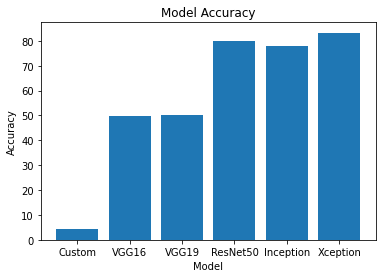

In [74]:
import matplotlib.pyplot as plt

data = {'Model':['Custom','VGG16','VGG19','ResNet50','Inception','Xception'],
       'Accuracy':[4.19,49.76,50.0,79.9,77.75,83.25]}

models = data['Model']
accuracy = data['Accuracy']

plt.bar(models, accuracy)
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [75]:
#Note: I'm not re-building the model as I already have the model built.
def predict_dog_breed(image_path, model=xception, dog_names=dog_names):
    """
        Fuction to predict the dog breed 
        Inputs:
            image_path: path to the input image
            model: model to be used for prediction
            dog_names: array containing dog breeds
        Returns:
            predicted dog breed
    """
    bottleneck_features=extract_Xception(path_to_tensor(image_path))
    prediction=dog_names[np.argmax(model.predict(bottleneck_features),axis=1)[0]]
    return prediction

In [76]:
predict_dog_breed(dog_files_short[0])

1/1 [==============================] - 0s 27ms/step


'train\\095.Kuvasz'

In [77]:
dog_names[np.argmax(train_targets[0])]

'train\\095.Kuvasz'

In [78]:
def identify_image(image_path, cnn=xception):
    """
        Function to predict the dog breed of an input image
        Inputs:
            image_path: path to the image on which prediction is to be made
            cnn: model to be used for prediction
        Output:
            Model prediction
    """
    #extract bottleneck features
    bottleneck_features=extract_Xception(path_to_tensor(image_path))
    #predict the dog breed
    predictions=cnn.predict(bottleneck_features)
    confidence=predictions.max()
    dog_breed=predict_dog_breed(image_path)
    
    img=cv2.imread(image_path)
    img_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    #output the prediction
    if dog_detector(image_path):
        plt.imshow(img_rgb)
        print('You belong to the breed '+dog_breed)
    elif face_detector(image_path):
        plt.imshow(img_rgb)
        print('You look like a '+dog_breed)
    else:
        print('Error! Neither dogs nor humans detected in the image.')
        plt.imshow(img_rgb)
    plt.show()

1/1 [==============================] - 1s 676ms/step
You belong to the breed train\046.Cavalier_king_charles_spaniel


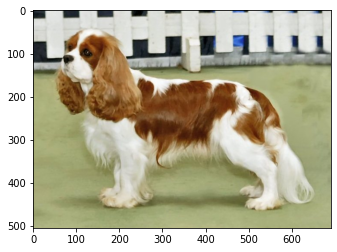

In [79]:
identify_image("C:/Users/USER/OneDrive/Desktop/CarterBIS.Tiki.13.6.09.jpg")

1/1 [==============================] - 0s 102ms/step
You belong to the breed train\076.Golden_retriever


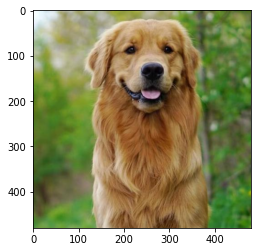

In [80]:
identify_image("C:/Users/USER/OneDrive/Desktop/golden-retriever-dog-breed-info.jpg")